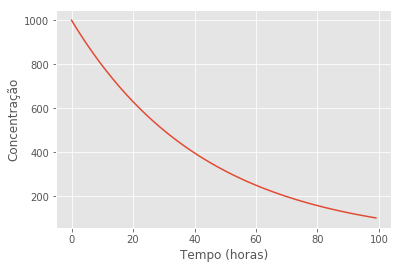

In [159]:
'''
João Zsigmond & André Nadalini

Modelos de concentração de Doxorrubicina no sangue, a partir de um diagrama de estoques e fluxos.

'''

import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.integrate import odeint

style.use('ggplot')

# definindo 1a iteração => valores em horas => Apenas um estoque: Sangue
def EqDif(ListaSolucao, t, ke):
    S=ListaSolucao[0]
    dSdt=-S*ke
    return dSdt


def primeira_iteração():
    Dose = 1000
    Ke = math.log(2)/30
    tmax = 100
    delta_t = 1
    tempo = np.arange(0, tmax, delta_t)
    c0=[Dose]

    solucao = odeint(EqDif, c0, tempo, args=(Ke, ))

    plt.plot(tempo, solucao)
    plt.xlabel('Tempo (horas)')
    plt.ylabel('Concentração')
    plt.show()

primeira_iteração()



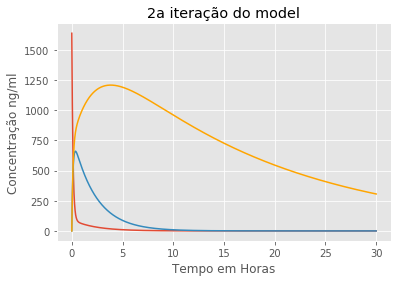

In [160]:
# Nossa segunda iteracao, leva em conta 3 estoques; O Sangue, O Tecido e o rim e o figado.

def eqdif2(listaSolucao, tempo):
    kd=math.log(2)/0.0833/2
    km=math.log(2)/30
    ke=math.log(2)/12
    kv=0.9
    S=listaSolucao[0]
    T=listaSolucao[1]
    RF=listaSolucao[2]
    
    dSdt=-2*kd*S+kv*T
    dTdt=kd*S-km*T-kv*T
    dRFdt=kd*S-ke*RF
    return dSdt, dTdt, dRFdt

tmax=30
delta_t=1e-3
tempo=np.arange(0, tmax, delta_t)


c0=[Dose,0,0]
solucao = odeint(eqdif4, c0, tempo)
plt.plot(tempo, solucao[:, 0])
plt.plot(tempo, solucao[:, 1])
plt.plot(tempo, solucao[:, 2], 'orange')
plt.title('2a iteração do model')
plt.xlabel('Tempo em Horas')
plt.ylabel('Concentração ng/ml')
plt.show()


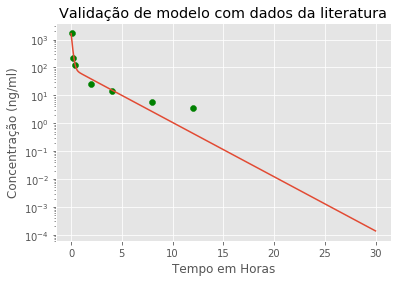

In [161]:
# Validacao da nossa segunda iteração com dados da literatura

plt.scatter(lista_x, lista_y, c='green')
plt.plot(tempo, solucao[:, 0])
plt.yscale('log')
plt.title('Validação de modelo com dados da literatura')
plt.xlabel('Tempo em Horas')
plt.ylabel('Concentração (ng/ml)')
plt.show()


# fonte:
# https://www.researchgate.net/publication/280033479_Abstract_2627_Lapatinib_promotes_promoted_the_incidence_of_hepatotoxicity_by_increasing_chemotherapeutic_agent_accumulation_in_hepatocytes
